In [ ]:
# Let's Watch Netflix!

**What are the trends in movies and tv shows of Netflix? A Netflix Data Visualization**

In the present notebook I am going to analize and gain insight of the kind of content available in the Netflix dataset. 

The dataset (netflix_titles.csv) consists of tv shows and movies available on Netflix as of 2019 and contains information including:

- General information: id, title, type (TV Show or Movie), director, cast and a brief description.
- Date fields: When the show was released and when it was added to the catalog.
- Categorization: Rating and category in which the show is listed.

The dataset provides a unique perspective on the world’s most lucrative cultural industry, reflected by Netflix: Movie and TV Production. Demand for data has never been greater as digital technology transforms the ways in which films are produced, distributed and consumed by audiences in theatres and in the case of Netflix, at home.

Let's figure out current trends! For example, in this notebook, following questions are analized.

- Which show is more common in this Netflix dataset, movie or TV show?
- What is the most frequent word in the datasets's show titles?
- Which country produces most titles?
- How long is a typical movie?
- Which show genre is the most frequently ocurring in Netflix?

In [ ]:
## Loading data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly

In [3]:
titles = pd.read_csv('netflix_titles.csv')
titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [ ]:
## Basic Information

In [4]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
titles.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [6]:
titles.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Data Transformation

Enforcing data types

In [7]:
titles.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

The column "date_added" is not a datetime. I convert its values into dates:

In [8]:
titles['date_added'] = pd.to_datetime(titles['date_added'])

In [9]:
titles.dtypes

show_id                  int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [10]:
#check about NaN data of each column
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      4265 non-null   object        
 4   cast          5664 non-null   object        
 5   country       5758 non-null   object        
 6   date_added    6223 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 584.6+ KB


## Exploratory Analysis and Visualization

I will now visualize the above data into various graphs and charts for a better understanding of trends, using seaborn and matplotlib.

In [ ]:
**Percentage of movies and TV shows**

In [11]:
#separate movies and tv_shows:
movie_rows = titles.loc[titles["type"] == "Movie"]
tv_rows = titles.loc[titles["type"] == "TV Show"]

# Calculate percentages of movies and tv shows:
movies_per = round(movie_rows.shape[0] / titles["type"].shape[0] * 100, 2)
tvshows_per = round(tv_rows.shape[0] / titles["type"].shape[0] * 100, 2)

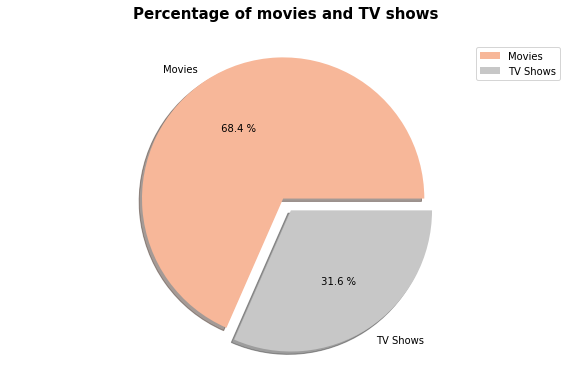

In [12]:
fig = plt.figure(figsize=(10, 6))

plt.pie([movies_per, tvshows_per], labels=["Movies", "TV Shows"], shadow=True, startangle=0, autopct ='% 1.1f %%', explode=(0, 0.1), colors=sns.color_palette("RdGy", n_colors=2))
plt.axis('equal')

plt.title('Percentage of movies and TV shows\n', fontsize=15, fontweight='bold')
plt.legend(["Movies", "TV Shows"], loc=0);

The presence of more movies than tv shows in the dataset conveys the idea that Netflix tends to add more movies to the platform than tv shows, supposingly based on consumers' preferencies.

**Top 10 producing countries**

In [13]:
#group the number of titles produced per country and then will plot two figures
most_titles_produced = titles.groupby('country').count().sort_values('title',ascending=False).head(10)

most_titles_produced.reset_index(inplace=True)
most_titles_produced

,country,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
0,United States,2032,2032,2032,1475,1808,2026,2032,2029,2032,2032,2032
1,India,777,777,777,721,755,777,777,777,777,777,777
2,United Kingdom,348,348,348,175,291,347,348,348,348,348,348
3,Japan,176,176,176,55,174,175,176,175,176,176,176
4,Canada,141,141,141,88,125,141,141,141,141,141,141
5,South Korea,136,136,136,39,133,136,136,136,136,136,136
6,Spain,117,117,117,83,103,117,117,117,117,117,117
7,France,90,90,90,51,77,90,90,90,90,90,90
8,Mexico,83,83,83,55,78,83,83,83,83,83,83
9,Turkey,79,79,79,60,79,79,79,79,79,79,79


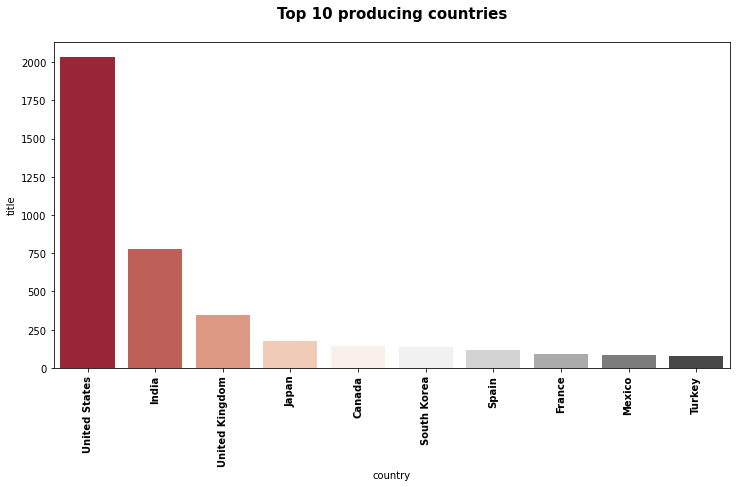

In [14]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

ax = plt.subplot(gs[0])

sns.barplot(x=most_titles_produced.country, y=most_titles_produced.title, data=most_titles_produced, palette="RdGy")
#hue colors: Movies and TV

ax.set_xticklabels(most_titles_produced.country, fontweight='bold', rotation='90')
ax.set_title('Top 10 producing countries\n', fontsize=15, fontweight='bold');

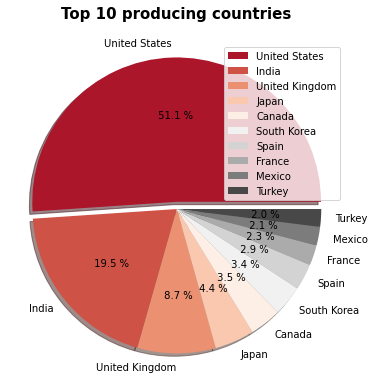

In [15]:
fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

explode = [0 for _ in range(10)]
explode[0] = 0.05

ax2 = plt.subplot(gs[1])

labels = most_titles_produced.country
sizes = most_titles_produced.title 

ax2.pie(sizes, labels=labels, shadow=True, startangle=0, autopct ='% 1.1f %%', explode=explode, colors=sns.color_palette("RdGy", n_colors=10))
ax2.axis('equal')

ax2.set_title('Top 10 producing countries\n', fontsize=15, fontweight='bold')
plt.legend(labels, loc=0);

Both bar and pie plot show that the USA clearly produces more than 50% of all titles. USA is currently leading by a huge margin followed by India and United Kingdom.

**Relation Movie Duration - Release Year**

In [16]:
# Examine duration column wether Netflix tend to add shorter or longer movies
titles[titles.type == 'Movie'].duration.head()

0     90 min
1     94 min
4     99 min
6    110 min
7     60 min
Name: duration, dtype: object

In [17]:
def to_minutes(series): #function to return only the first element
    return series.split()[0]
    
        
titles['duration'] = titles.duration.apply(lambda x: to_minutes(x))

In [18]:
titles[titles.type == 'Movie'].duration.head()

0     90
1     94
4     99
6    110
7     60
Name: duration, dtype: object

In [19]:
titles['duration'] = titles.duration.astype('int')

In [20]:
#What is the average and median duration of all movies?
titles[titles.type == 'Movie'].duration.mean()

99.10082063305978

In [21]:
titles[titles.type == 'Movie'].duration.median()

98.0

The average duration for all movies released on Netflix is ~ 99 minutes and has a median of 98 minutes. Visualizing the distribution of movie durations can give us a more clear picture of the data.

In [22]:
#duration_by_year = titles[titles.type == 'Movie'].groupby(titles.date_added.dt.year).mean().duration
duration_by_year = titles[titles.type == 'Movie'][['duration', 'release_year']]
duration_by_year

,duration,release_year
0,90,2019
1,94,2016
4,99,2017
6,110,2014
7,60,2017
...,...,...
5577,70,2007
5578,102,2015
5579,88,2014
5580,109,2015


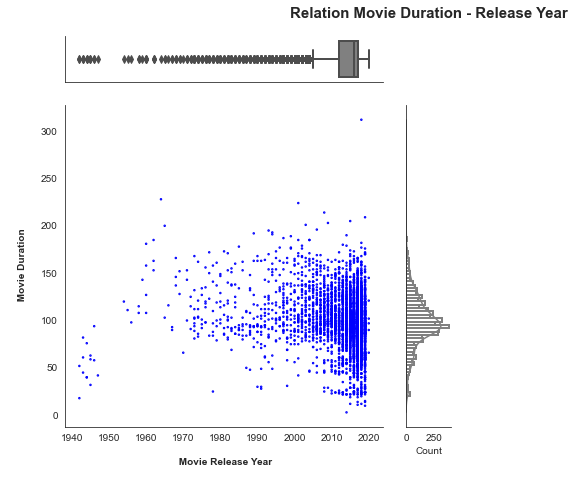

In [23]:
sns.set_style(style='white')

g = sns.JointGrid(marginal_ticks=True, space=0.5, palette='RdGy')
x, y = duration_by_year.release_year, duration_by_year.duration
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=1, linewidth=1.5, ax=g.ax_joint) #marginal_ticks=True)
sns.histplot(y=y, fill=False, linewidth=2, ax=g.ax_marg_y, kde=True, color = 'grey')
sns.boxplot(x=x, linewidth=2, ax=g.ax_marg_x, color='grey')

g.ax_joint.set_xlabel('\n Movie Release Year\n', fontweight='bold')
g.ax_joint.set_ylabel('\n Movie Duration\n', fontweight='bold')

g.ax_marg_x.get_yticklabels()
g.ax_marg_y.get_xticklabels()

plt.title('Relation Movie Duration - Release Year\n\n\n\n\n', fontsize=15, fontweight='bold');

Here we can see several tendencies. Movie duration es normally distributed. The majority of the movies have a duration ranging from 85 min to 120 min. In terms of the boxplot, the interquartile range appears to be fairly small and there are many outliers present. The outliers hail from movies which were released between 1940s and until approx. 1980s and which gives rise to the visible dispersion in the scatter plot. Generally speaking we can see that indeed a correlation between movie duration and movie release year exists.

**Genres in Netflix**

In [24]:
top_listed_genre = titles.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
top_listed_genre

title
Norm of the North: King Sized Adventure        Children & Family Movies
Norm of the North: King Sized Adventure                        Comedies
Jandino: Whatever it Takes                              Stand-Up Comedy
Transformers Prime                                             Kids' TV
Transformers: Robots in Disguise                               Kids' TV
                                                         ...           
A Young Doctor's Notebook and Other Stories            British TV Shows
A Young Doctor's Notebook and Other Stories                 TV Comedies
A Young Doctor's Notebook and Other Stories                   TV Dramas
Friends                                               Classic & Cult TV
Friends                                                     TV Comedies
Length: 13670, dtype: object

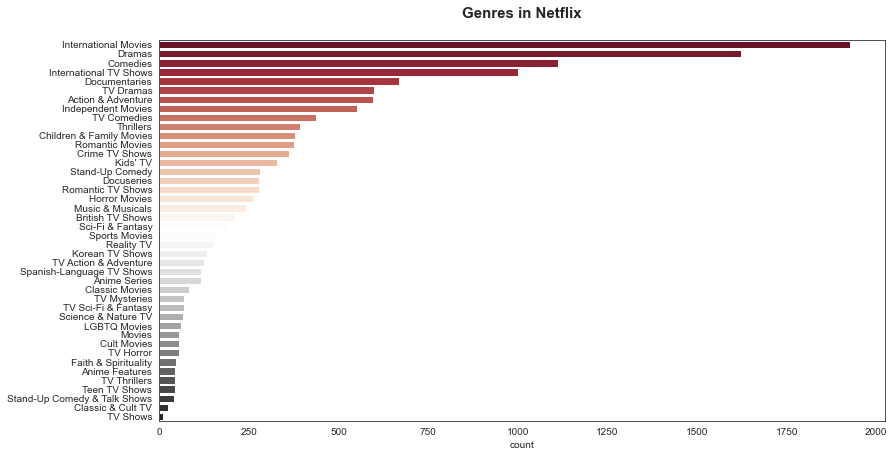

In [25]:
plt.figure(figsize=(13,7))
plt.title('Genres in Netflix\n', fontsize=15, fontweight='bold')

sns.set_style(style='white')

sns.countplot(y = top_listed_genre, order=top_listed_genre.value_counts().index[:], palette='RdGy');

The most popular category on Netflix for both movies and TV shows, with the most titles, is international Movies, followed by Dramas.

**Movie Genre Relation**

In [26]:
titles['genre'] = titles['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
genre_movies=titles[titles.type == 'Movie']['genre']
genre_movies

0                    [Children & Family Movies, Comedies]
1                                       [Stand-Up Comedy]
4                                              [Comedies]
6       [International Movies, Sci-Fi & Fantasy, Thril...
7                                       [Stand-Up Comedy]
                              ...                        
5577                                      [Documentaries]
5578               [Comedies, Dramas, Independent Movies]
5579                       [Documentaries, Sports Movies]
5580                                      [Documentaries]
6231                                             [Movies]
Name: genre, Length: 4265, dtype: object

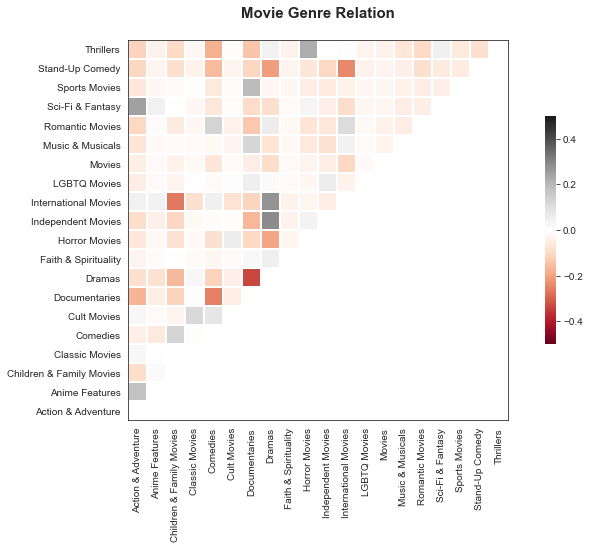

In [27]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

#prepare dataframe to plot a correlation
df = pd.DataFrame(mlb.fit_transform(genre_movies), columns=mlb.classes_, index=genre_movies.index)
corr = df.corr()

#change matrix shape
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #.triu() is a method in NumPy that returns the lower triangle of any matrix given to it

cmap = sns.color_palette("RdGy", as_cmap=True)

sns.set_style(style='white')

plt.figure(figsize=(13,7))
plt.title('Movie Genre Relation\n', fontsize=15, fontweight='bold')

pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, vmin=-.5, center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.6}, linewidth=1)

pl.invert_yaxis()

# make frame visible
for _, spine in pl.spines.items():
    spine.set_visible(True);

For movies the negative relationship between drama and documentary is remarkable. There are many dramas for independent and international films.

**Title WordCloud in Netflix dataset**

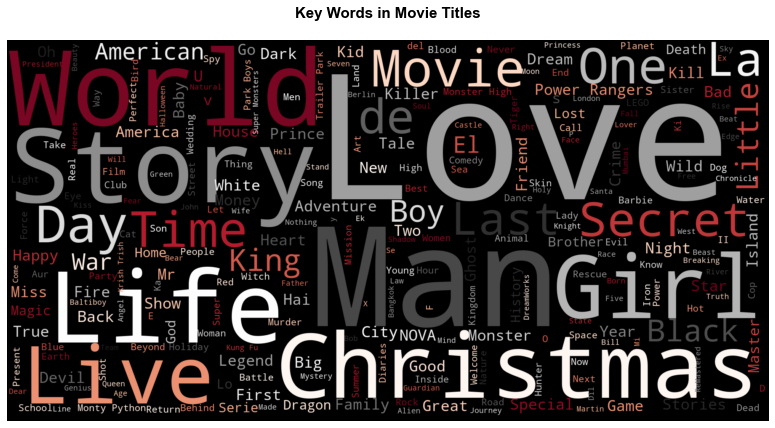

In [35]:
#use wordcloud to represent text data in which the size of each word indicates its frequency or importance.

from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

plt.style.use('seaborn')

from PIL import Image

words = titles["title"].str.split("(").str[0].value_counts().keys()

word_cloud = WordCloud(stopwords=STOPWORDS,scale=5,max_words=1000,colormap="RdGy",background_color="black").generate(" ".join(words))

plt.figure(figsize=(15,7))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Movie Titles\n",color='black',fontsize=15, fontweight='bold')

plt.savefig("output.png");

'Love', 'Man', 'World', 'Story', 'Christmas' etc. are some of the most frequent and important words for Movie Title.

**Propositions on Future Follow - up**

Some further in - depth - analysis related to the 'rating' column might be done in the future. If we have the users' ratings of all dataset, we might create a recommendation system. We might also have a closer look and shed light on the directors' column to gather further tendencies.

# Sources

https://www.kaggle.com/shivamb/netflix-shows